# Write a function to return a dataframe containing every transaction with a total value of over 100. Include the total value of the transaction as a new column in the dataframe.

In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

from scipy import stats
import statsmodels.api as sm
import random
import seaborn as sns
plt.style.use("fivethirtyeight")

from scipy.stats import chi2_contingency
from scipy.stats import chi2

In [33]:
# Set default plotting parameters
plt.rcParams['figure.figsize'] = [20.0, 7.0]
plt.rcParams.update({'font.size': 22})
plt.tight_layout()

sns.set_palette('colorblind')
sns.set_style('white')
sns.set_context('talk')

<Figure size 1440x504 with 0 Axes>

In [16]:
import pandas as pd

transactions = {"transaction_id" : [1, 2, 3, 4, 5], "product_id" : [101, 102, 103, 104, 105], "amount" : [3, 5, 8, 3, 2]}

products = {"product_id" : [101, 102, 103, 104, 105], "price" : [20.00, 21.00, 15.00, 16.00, 52.00]}

In [17]:
df_transactions = pd.DataFrame(transactions)
df_products = pd.DataFrame(products)

In [18]:
df = pd.merge(df_transactions, df_products, on="product_id", how="left")
df.head(5)

,transaction_id,product_id,amount,price
0,1,101,3,20.0
1,2,102,5,21.0
2,3,103,8,15.0
3,4,104,3,16.0
4,5,105,2,52.0


In [19]:
# check number of unique values in the dataset
for i in list(df.columns):
    print(f'Unique {i}: {df[i].nunique()}')

Unique transaction_id: 5
Unique product_id: 5
Unique amount: 4
Unique price: 5


In [20]:
# checking for null values
df.isnull().sum()

transaction_id    0
product_id        0
amount            0
price             0
dtype: int64

In [21]:
# statistics about numerical data
df.describe()

,transaction_id,product_id,amount,price
count,5.000000,5.000000,5.000000,5.000000
mean,3.000000,103.000000,4.200000,24.800000
std,1.581139,1.581139,2.387467,15.417522
min,1.000000,101.000000,2.000000,15.000000
25%,2.000000,102.000000,3.000000,16.000000
50%,3.000000,103.000000,3.000000,20.000000
75%,4.000000,104.000000,5.000000,21.000000
max,5.000000,105.000000,8.000000,52.000000


In [22]:
# checking column types
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5 entries, 0 to 4
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   transaction_id  5 non-null      int64  
 1   product_id      5 non-null      int64  
 2   amount          5 non-null      int64  
 3   price           5 non-null      float64
dtypes: float64(1), int64(3)
memory usage: 200.0 bytes


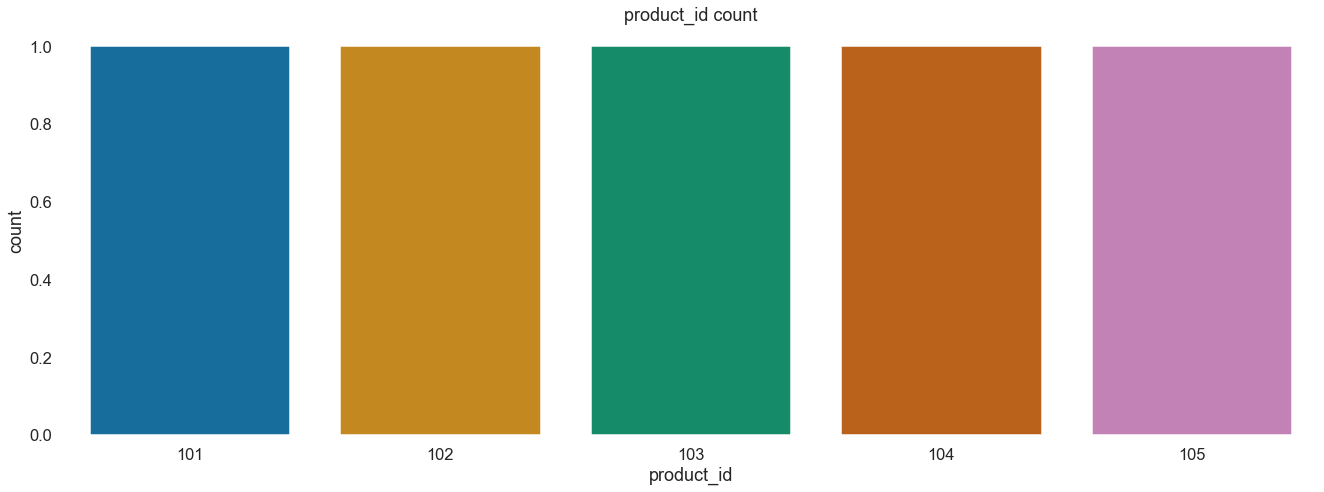

In [30]:
#visualize status feature
sns.countplot(x=df['product_id'], order = df['product_id'].value_counts().index, palette='colorblind')
sns.despine(left=True, bottom=True)
plt.title('product_id count')
plt.show()

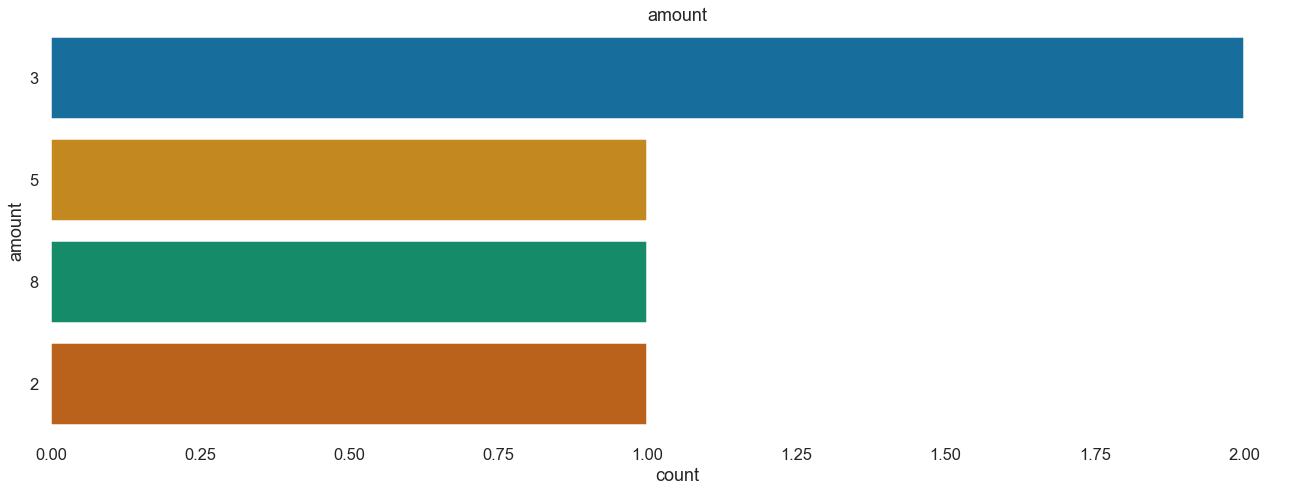

In [26]:
#visualize team feature
sns.countplot(y=df['amount'], order = df['amount'].value_counts().index, palette='colorblind')
sns.despine(left=True, bottom=True)
plt.title('amount count')
plt.show()

In [38]:
df['total'] = df['amount'] * df['price']
df.head(5)

,transaction_id,product_id,amount,price,total
0,1,101,3,20.0,60.0
1,2,102,5,21.0,105.0
2,3,103,8,15.0,120.0
3,4,104,3,16.0,48.0
4,5,105,2,52.0,104.0


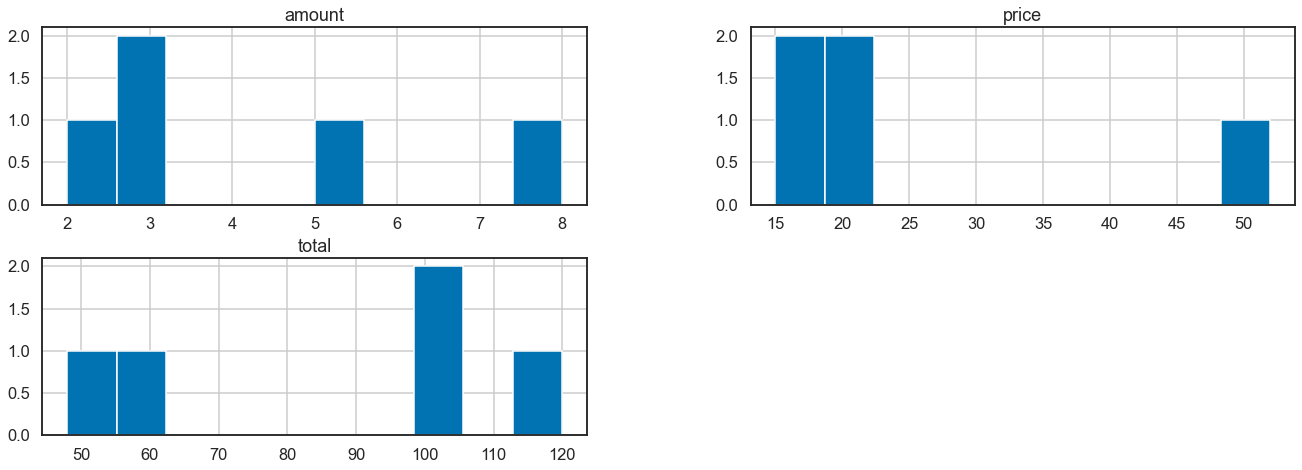

In [39]:
# create histograms of all numerical data

df_hist = df[['amount', 'price', 'total']]
df_hist.hist()
plt.show()

In [44]:
# group the data to find widget making statistics by worker
df_grouped = df.groupby(['product_id']).agg({'total':'sum',
                                             'price':'mean'}).reset_index(name ='product_total_sum')
df_grouped.head()

TypeError: reset_index() got an unexpected keyword argument 'name'

In [40]:
tot = df.groupby('product_id')['total'].sum().reset_index(name ='product_total_amount')
tot.head(5)

,product_id,product_total_amount
0,101,60.0
1,102,105.0
2,103,120.0
3,104,48.0
4,105,104.0


In [41]:
# find total product amount greater than 100
tot.loc[tot['product_total_amount'] > 100.0]

,product_id,product_total_amount
1,102,105.0
2,103,120.0
4,105,104.0


### End